In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
base_dir = '/home/user_7428/yonatan/fsd50k/results'
experiment_one_dir = f"{base_dir}/experiment_one_data_variance"
experiment_two_dir = f"{base_dir}/experiment_two_sample_size"

In [3]:
def read_data(dir_path):
    exp_results = []
    for root, _, files in os.walk(dir_path):
        for file_name in files:
            with open(f"{root}/{file_name}", 'rb') as f:
                d = pickle.load(f)
            current = {
                file_name.split('_')[i+1].replace('.txt',''): float(file_name.split('_')[i]) 
                for i in range(1, len(file_name.split('_')), 2)
            }
            current['ece'] = d['ece']
            current['acc'] = d['acc']
            exp_results.append(current)
    return exp_results

In [4]:
exp1_results = read_data(experiment_one_dir)

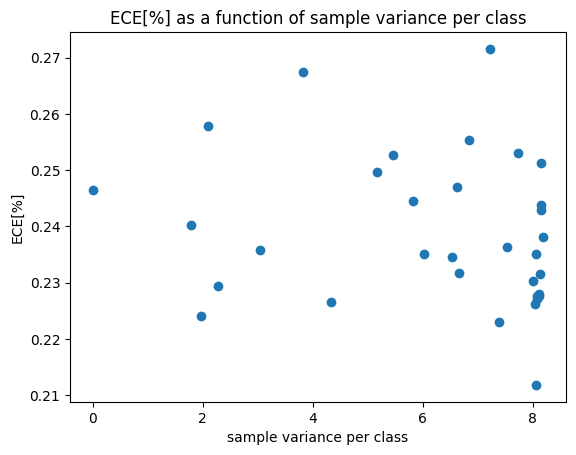

In [10]:
x = np.array([d['variance'] ** 0.5 for d in exp1_results])
y = np.array([d['ece'] for d in exp1_results])
plt.scatter(x, y)
plt.title('ECE[%] as a function of sample variance per class')
plt.xlabel('sample variance per class')
plt.ylabel('ECE[%]')
plt.show()

In [6]:
exp2_results = read_data(experiment_two_dir)

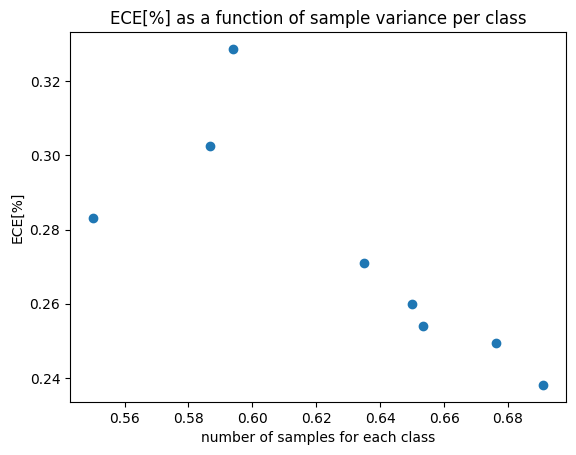

In [9]:
x = np.array([d['samplesperclass'] for d in exp2_results])
y = np.array([d['ece'] for d in exp2_results])
plt.scatter(x, y)
plt.title('ECE[%] as a function of sample variance per class')
plt.xlabel('number of samples for each class')
plt.ylabel('ECE[%]')
plt.show()